In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
onlyfiles = [f for f in os.listdir(os.getcwd()) if os.path.isfile(os.path.join(os.getcwd(), f))]

<h3>Adding attributes to data</h3>

In [6]:
filename = onlyfiles[1]
names = ['age', 
         'job', 
         'marital', 
         'education', 
         'default',
         'balance',
         'housing', 
         'loan', 
         'contact', 
         'day', 
         'month',
         'duration',
         'campaign',
         'pdays',
         'previous',
         'poutcome',
         'y']

data = pd.read_csv(filename, names=names)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<h3>Histogram plot</h3>

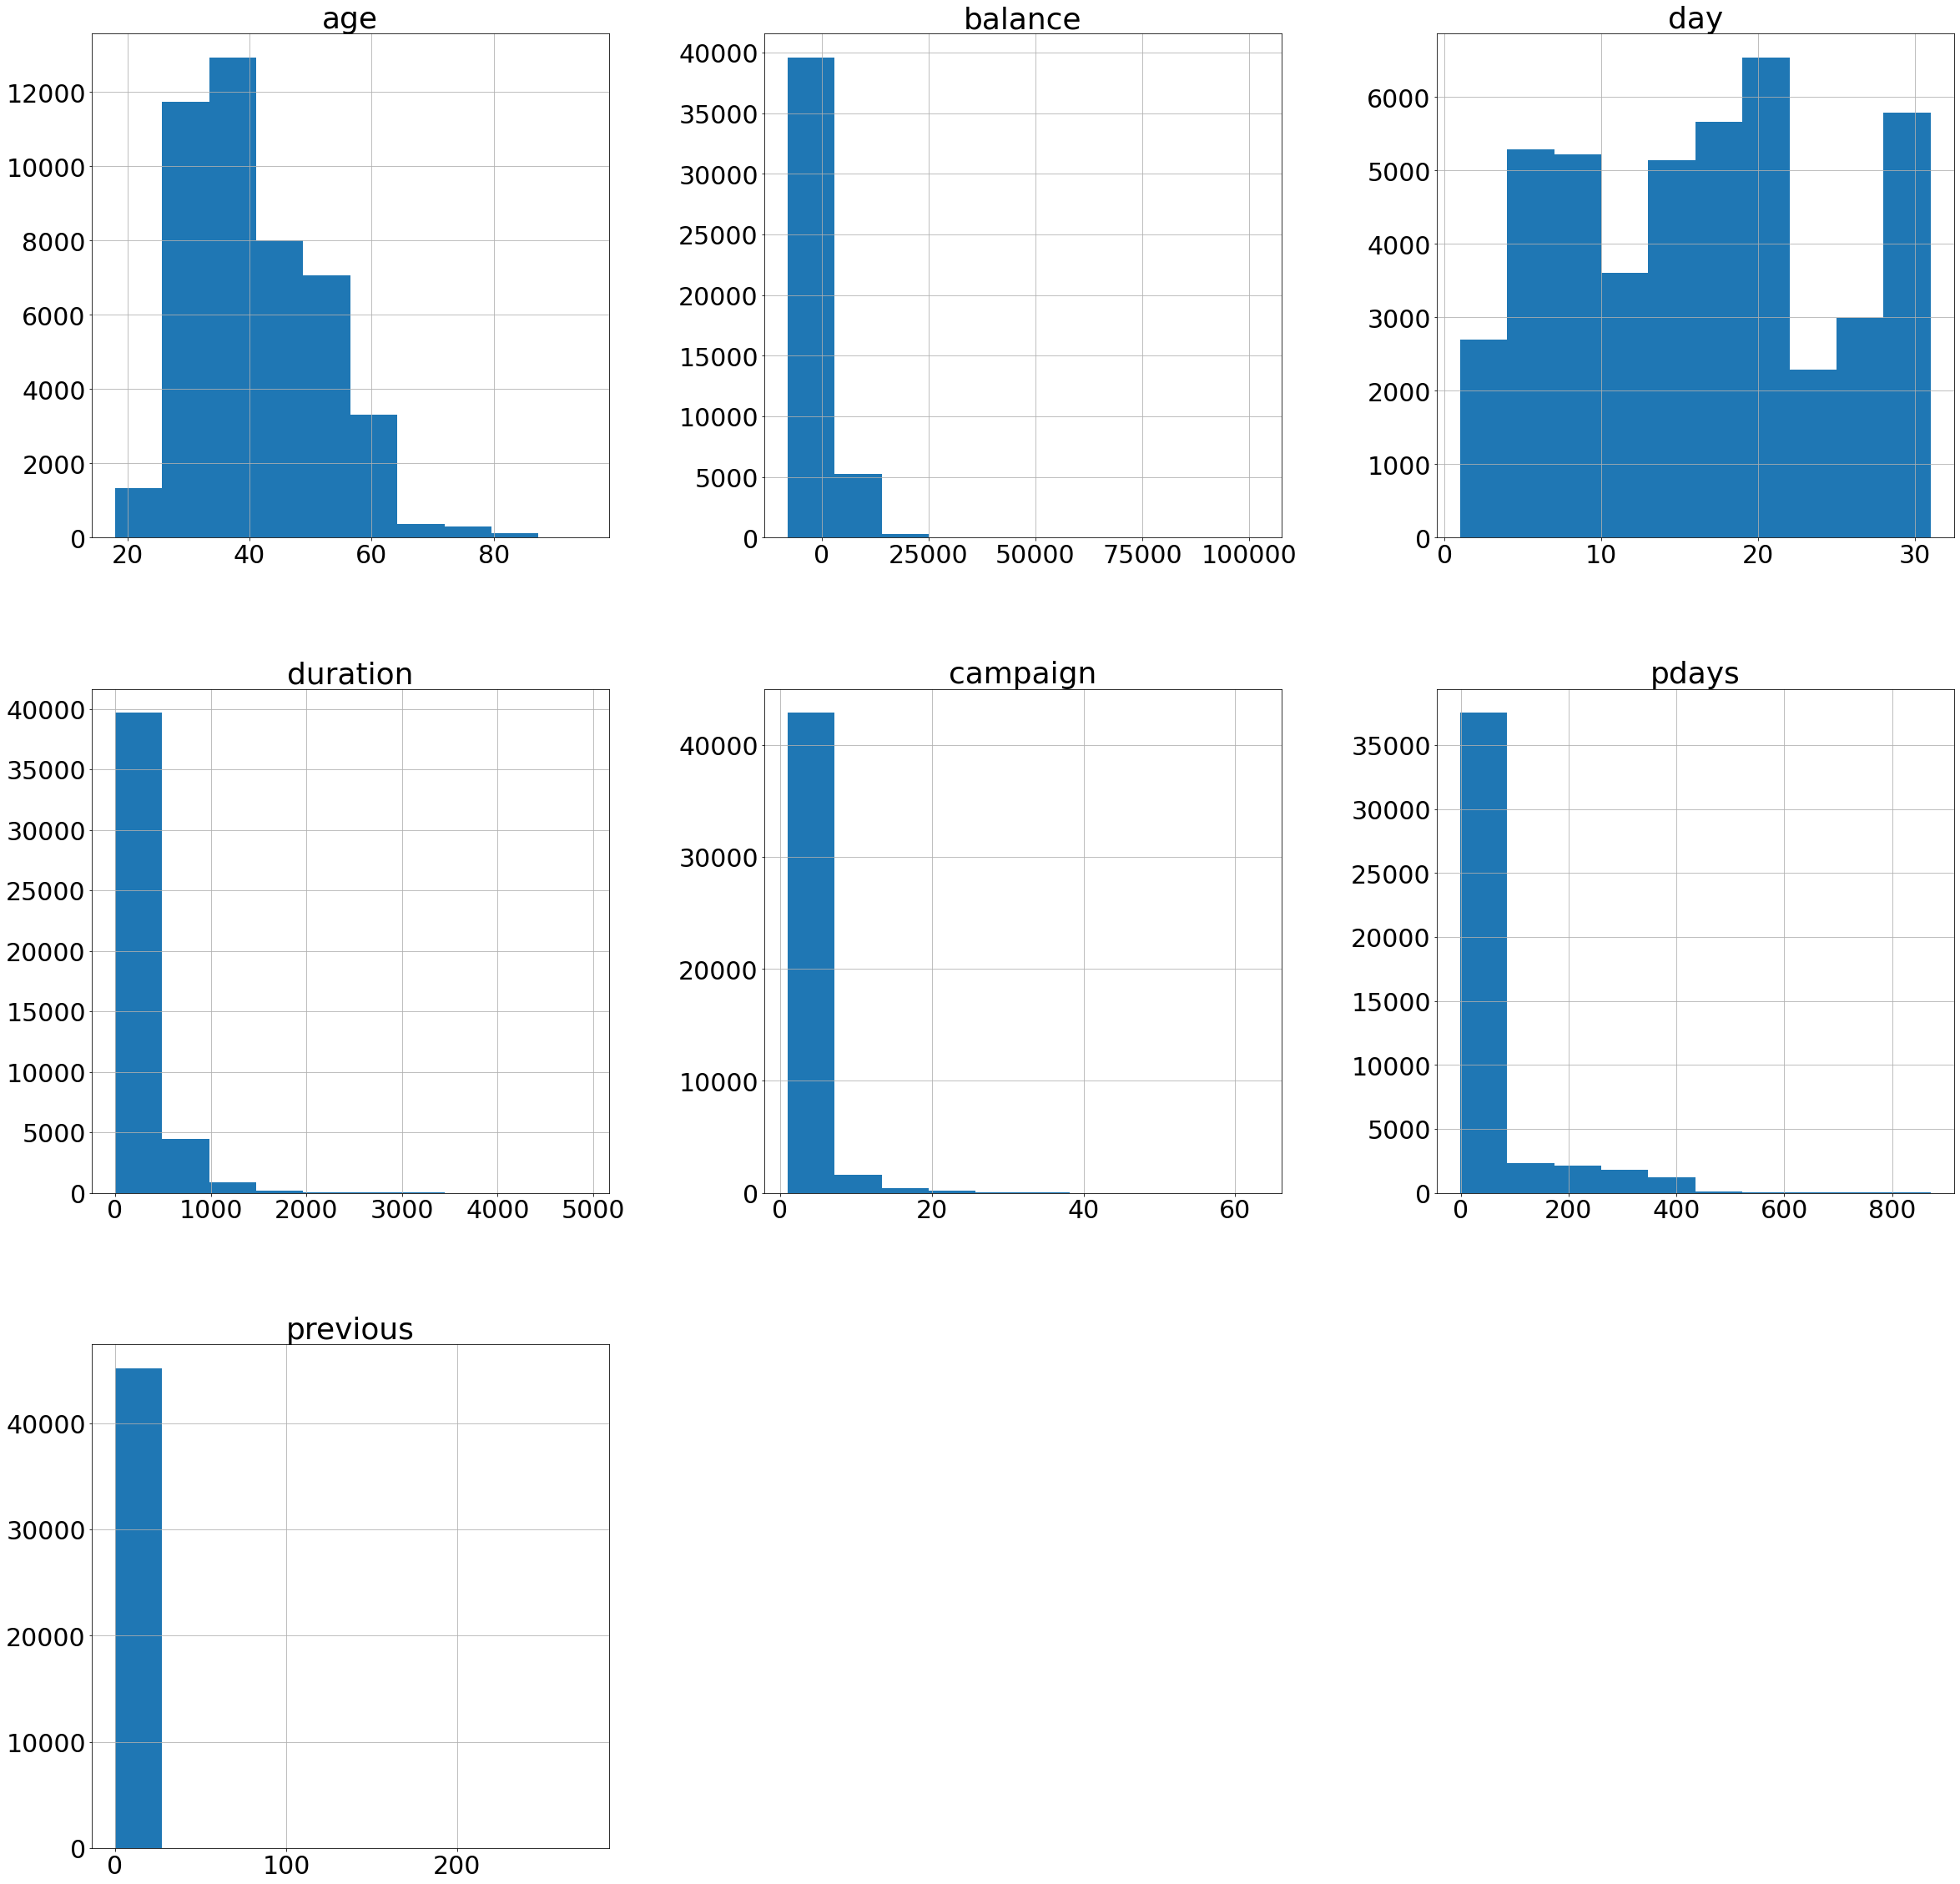

In [18]:
plt.rc('font', size = 30)
data.hist(figsize=(40,40))
plt.show()

<h3>Density plot</h3>

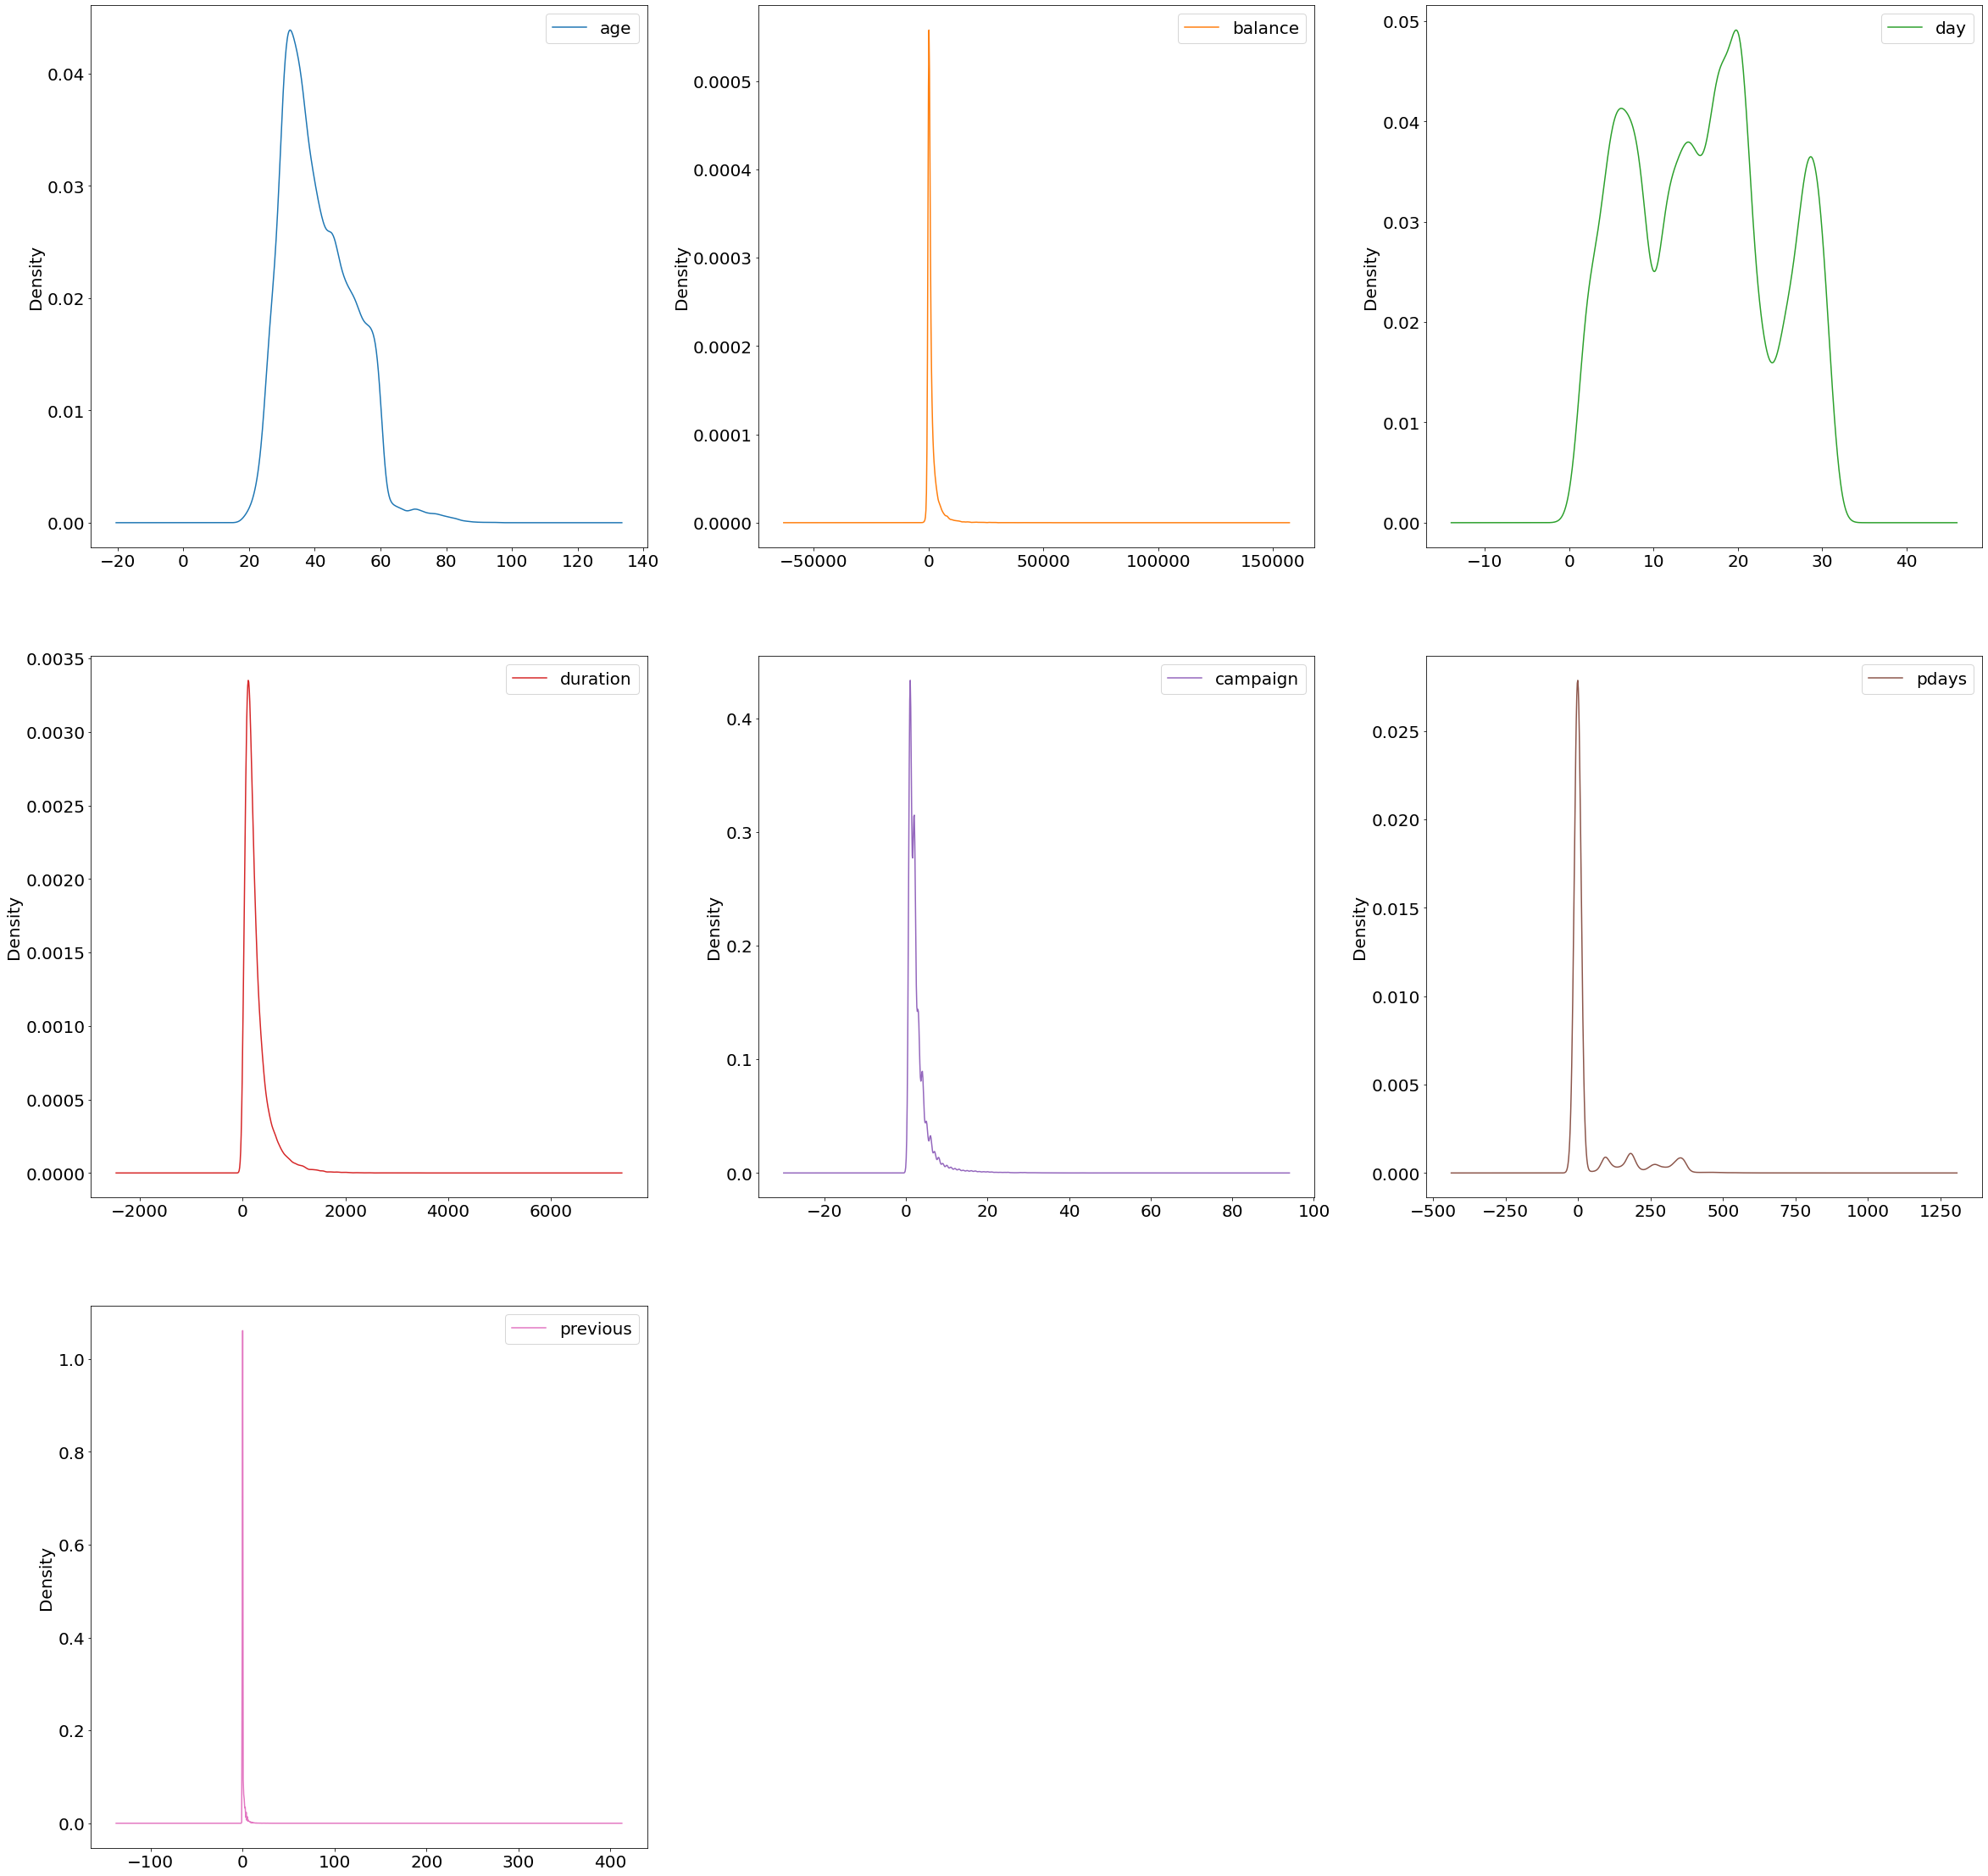

In [19]:
##Density plot
plt.rc('font', size = 20)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(40,40))
plt.show()

<h3>Data skewness</h3>

In [7]:
skew = data.skew()
print(skew)

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


Day's skewness value is 0.093 which means that its distribution is symmetrical. However, if we look at day's histogram it looks like there are certain days of the month when more calls are made, such as, the start of the second and third week and the end of the fourth week.

Age's skewness suggest that it's moderately skewed showing that there are more instances of with an age between 25 to 40 more or less.

Pdays and previous have a heavily positive skewness value. In the case of previous, it is so large because most of the instances had never been contacted before and the other instances have values that are relatively close to 0.

<h3>Data correlation</h3>

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000
Correlation Matrix


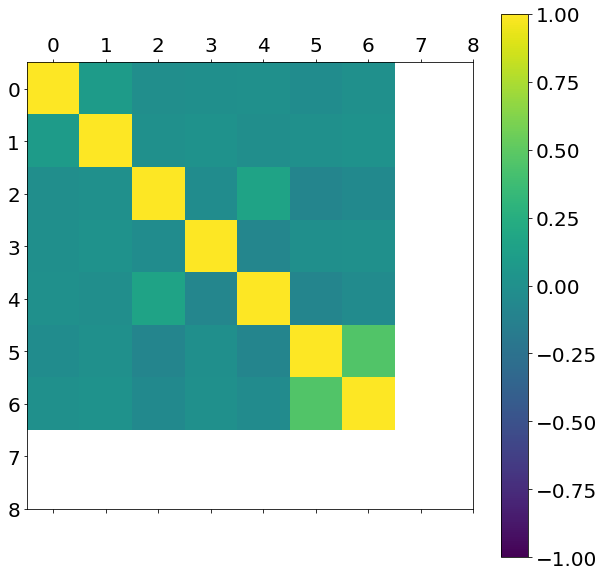

Correlation Table


,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


In [25]:
corr = data.corr()
print(corr)
print("Correlation Matrix")

# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()
print("Correlation Table")

# Correlation Table, note this does not export easily
corr.style.background_gradient().set_precision(2)

The correlation between previous and pdays isn't that strong. I believe the reason for this correlation is that for those instances where pdays is -1, previous will always be 0 because if someone has never been contacted before, there's no number of days that have passed since they were contacted.

<h3>Scatter plots</h3>

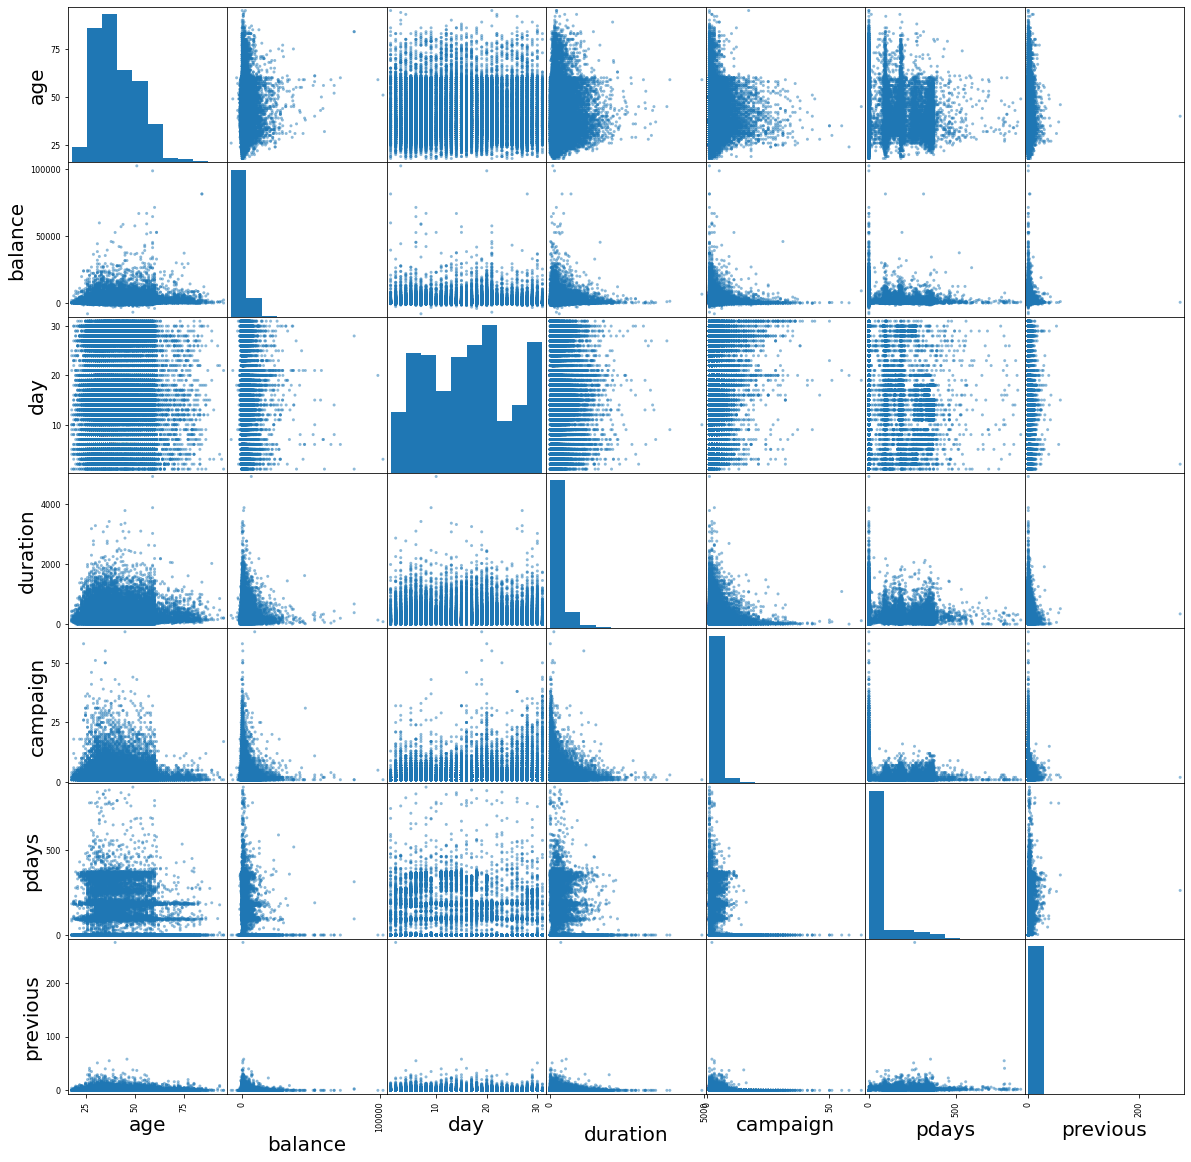

In [27]:
pd.plotting.scatter_matrix(data, figsize=(20,20))
plt.show()

<h3>Missing data or outliers</h3>
When it comes to missing data or outliers, I can't see any. All the values are either realistic or have an explanation to why it is that value, for example, -1 in pdays. Also, the categorical attributes have a value called 'unknown' replacing all possible missing or wrong data. So, I believe this data has been cleaned beforehand and that's why there isn't any outliers or missing data.